<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Justificativa" data-toc-modified-id="Justificativa-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Justificativa</a></span></li><li><span><a href="#Testes-estatísticos" data-toc-modified-id="Testes-estatísticos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Testes estatísticos</a></span><ul class="toc-item"><li><span><a href="#Cohen's-D" data-toc-modified-id="Cohen's-D-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cohen's D</a></span></li></ul></li><li><span><a href="#Tentando-inferir-causalidade" data-toc-modified-id="Tentando-inferir-causalidade-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tentando inferir causalidade</a></span><ul class="toc-item"><li><span><a href="#Regressões-lineares" data-toc-modified-id="Regressões-lineares-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Regressões lineares</a></span></li><li><span><a href="#Testes-pareados" data-toc-modified-id="Testes-pareados-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Testes pareados</a></span></li></ul></li></ul></div>

# Justificativa

A literatura indica que o fator mais importante para o desempenho das escolas é o nível sócio econômico dos alunos. Estamos pressupondo que escolas próximas possuem alunos de nível sócio econômico próximo, mas isso precisa ser testado. Usei os dados do [INSE](http://portal.inep.gov.br/web/guest/indicadores-educacionais) para medir qual era o nível sócio econômico dos alunos de cada escola em 2015.

In [1]:
import sen_plots as sen
import pandas as pd
import numpy as np

from scipy.stats import ttest_ind as ttest

In [2]:
inse = pd.read_excel("INSE_2015.xlsx")

In [3]:
inse.rename(columns={"CO_ESCOLA" : "cod_inep"}, inplace=True)
inse.head()

,cod_inep,NOME_ESCOLA,CO_UF,NOME_UF,CO_MUNICIPIO,NOME_MUNICIPIO,ID_AREA,TP_DEPENDENCIA,TP_LOCALIZACAO,QTD_ALUNOS_INSE,INSE_VALOR_ABSOLUTO,INSE_CLASSIFICACAO
0,11000058,CENTRO DE ENSINO CLASSE A,11,Rondônia,1100205,1100205,1,4,1,130,64.17,Grupo 6
1,11000171,CENTRO EDUCACIONAL MOJUCA,11,Rondônia,1100205,1100205,1,4,1,17,54.96,Grupo 4
2,11000198,CENTRO EDUCACIONAL OBJETIVO,11,Rondônia,1100205,1100205,1,4,1,37,61.17,Grupo 5
3,11000201,EEEF PROF HERBERT DE ALENCAR,11,Rondônia,1100205,1100205,1,2,1,86,53.46,Grupo 4
4,11000244,COLEGIO DOM BOSCO,11,Rondônia,1100205,1100205,1,4,1,49,56.88,Grupo 5


In [4]:
#importa os 3 datasets que eu quero comparar o INSE
ruim_pra_bom = pd.read_csv("referencias_ruim_bom_saeb.csv")
pessimo_pra_bom = pd.read_csv("referencias_pessimo_bom_saeb.csv")
risco = pd.read_csv("risco_map_saeb.csv")

In [5]:
ruim_pra_bom["tipo_especifico"] = "Ruim para bom"
pessimo_pra_bom["tipo_especifico"] = "Muito ruim para bom"
risco["tipo_especifico"] = "Desempenho abaixo\ndo esperado"

In [6]:
referencias = ruim_pra_bom.append(pessimo_pra_bom)

In [7]:
referencias.head()

,cod_inep,geometry,SMEDBOEs_5,tipo_especifico
0,33087784,POINT (679421.1058334643 7457258.094889611),Escola Municipal Abelardo Chacrinha Barbosa,Ruim para bom
1,33074763,POINT (669503.1900482271 7473170.03167243),Escola Municipal Velinda MaurÃ­cio da Fonseca,Ruim para bom
2,33082634,POINT (644436.3231128817 7467288.974674953),Escola Municipal Atenas,Ruim para bom
3,33083401,POINT (652578.255664465 7470428.539573877),Escola Municipal Samuel Wainer,Ruim para bom
4,33084874,POINT (632489.9890217567 7459373.891723582),Escola Municipal Nair da Fonseca,Ruim para bom


In [8]:
referencias = pd.merge(referencias, inse[["cod_inep", "NOME_ESCOLA", "INSE_VALOR_ABSOLUTO", "INSE_CLASSIFICACAO"]], how = "left", on = "cod_inep")
risco = pd.merge(risco, inse[["cod_inep", "NOME_ESCOLA", "INSE_VALOR_ABSOLUTO", "INSE_CLASSIFICACAO"]], how="left", on="cod_inep")

In [9]:
referencias.INSE_VALOR_ABSOLUTO.describe()

count    143.000000
mean      51.070629
std        1.934758
min       45.210000
25%       49.820000
50%       51.120000
75%       52.410000
max       55.410000
Name: INSE_VALOR_ABSOLUTO, dtype: float64

In [10]:
risco.INSE_VALOR_ABSOLUTO.describe()

count    143.000000
mean      50.000140
std        1.915025
min       42.060000
25%       48.920000
50%       50.460000
75%       51.240000
max       53.860000
Name: INSE_VALOR_ABSOLUTO, dtype: float64

In [11]:
risco["tipo"] = "Escolas com desempenho abaixo do esperado"
referencias["tipo"] = "Escolas-referência"

In [12]:
df = risco.append(referencias)

In [13]:
df.to_csv("risco_referencia_inse_saeb.csv", index = False)

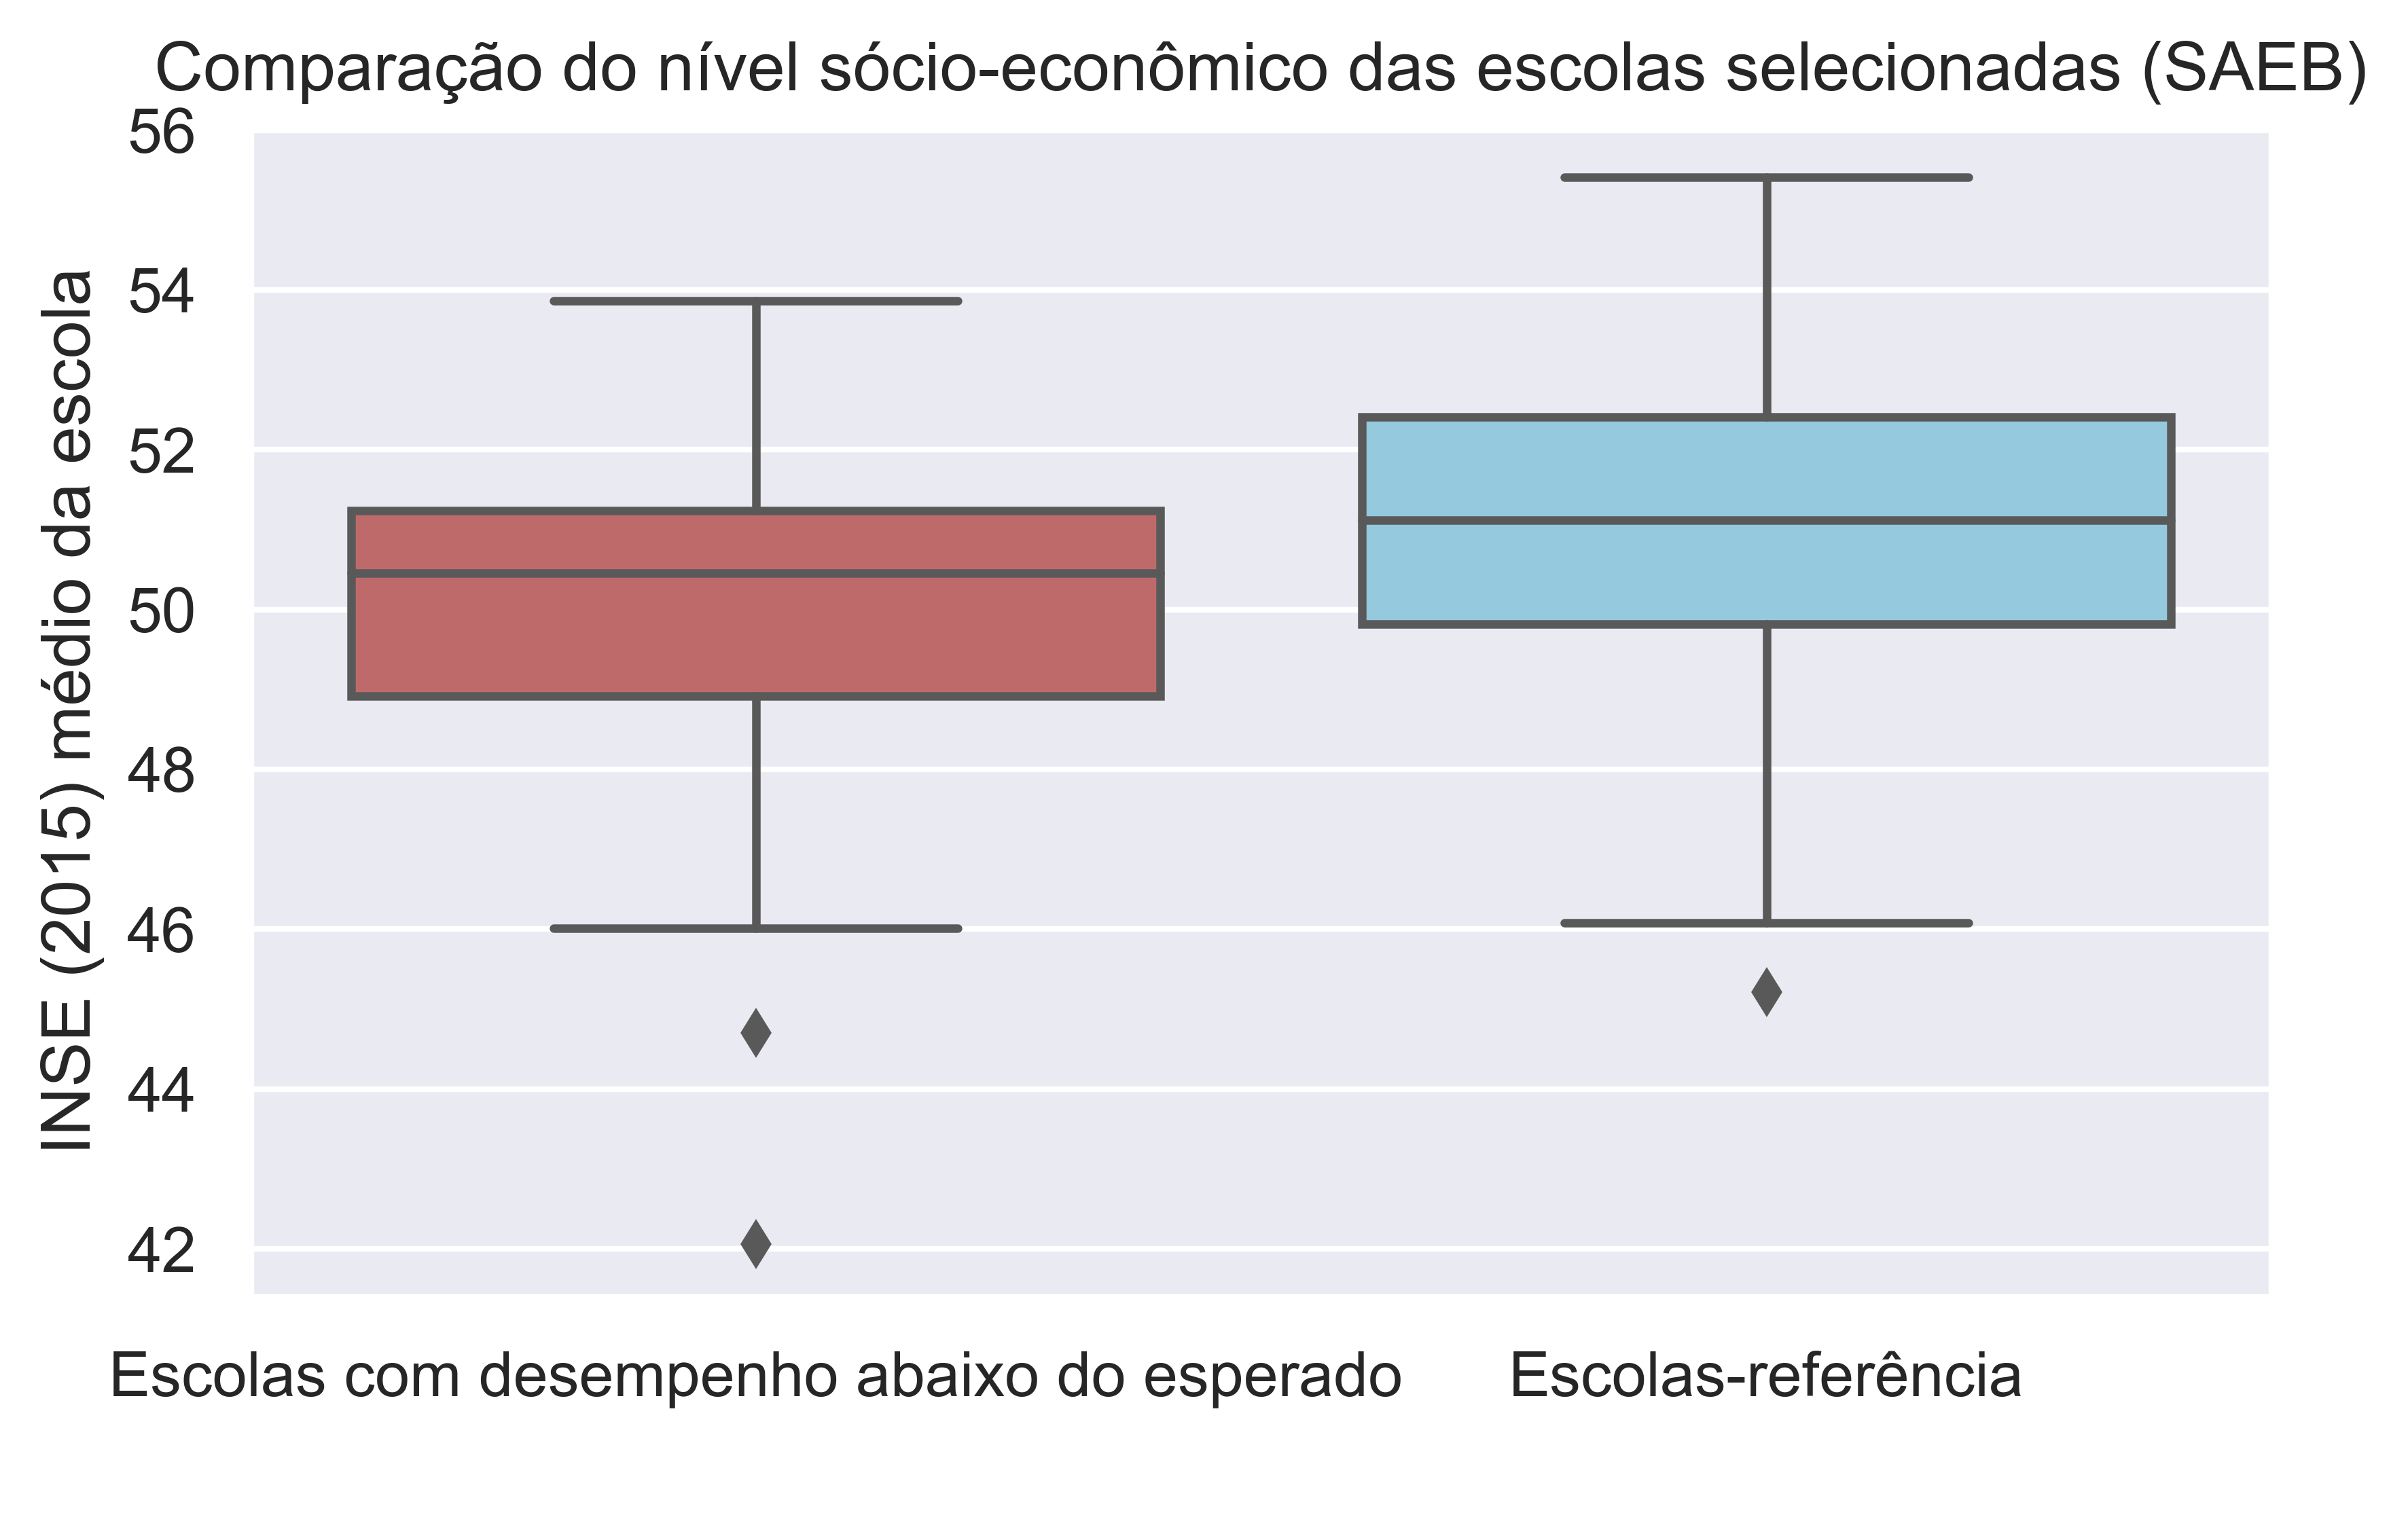

In [15]:
df = pd.read_csv("risco_referencia_inse_saeb.csv")

sen.sen_boxplot(x = "tipo", y = "INSE_VALOR_ABSOLUTO", y_label = "INSE (2015) médio da escola", x_label = " ",
                plot_title = "Comparação do nível sócio-econômico das escolas selecionadas (SAEB)",
                palette = {"Escolas com desempenho abaixo do esperado" : "indianred",
                          "Escolas-referência" : "skyblue"},
                data = df, output_path = "inse_op1.png")

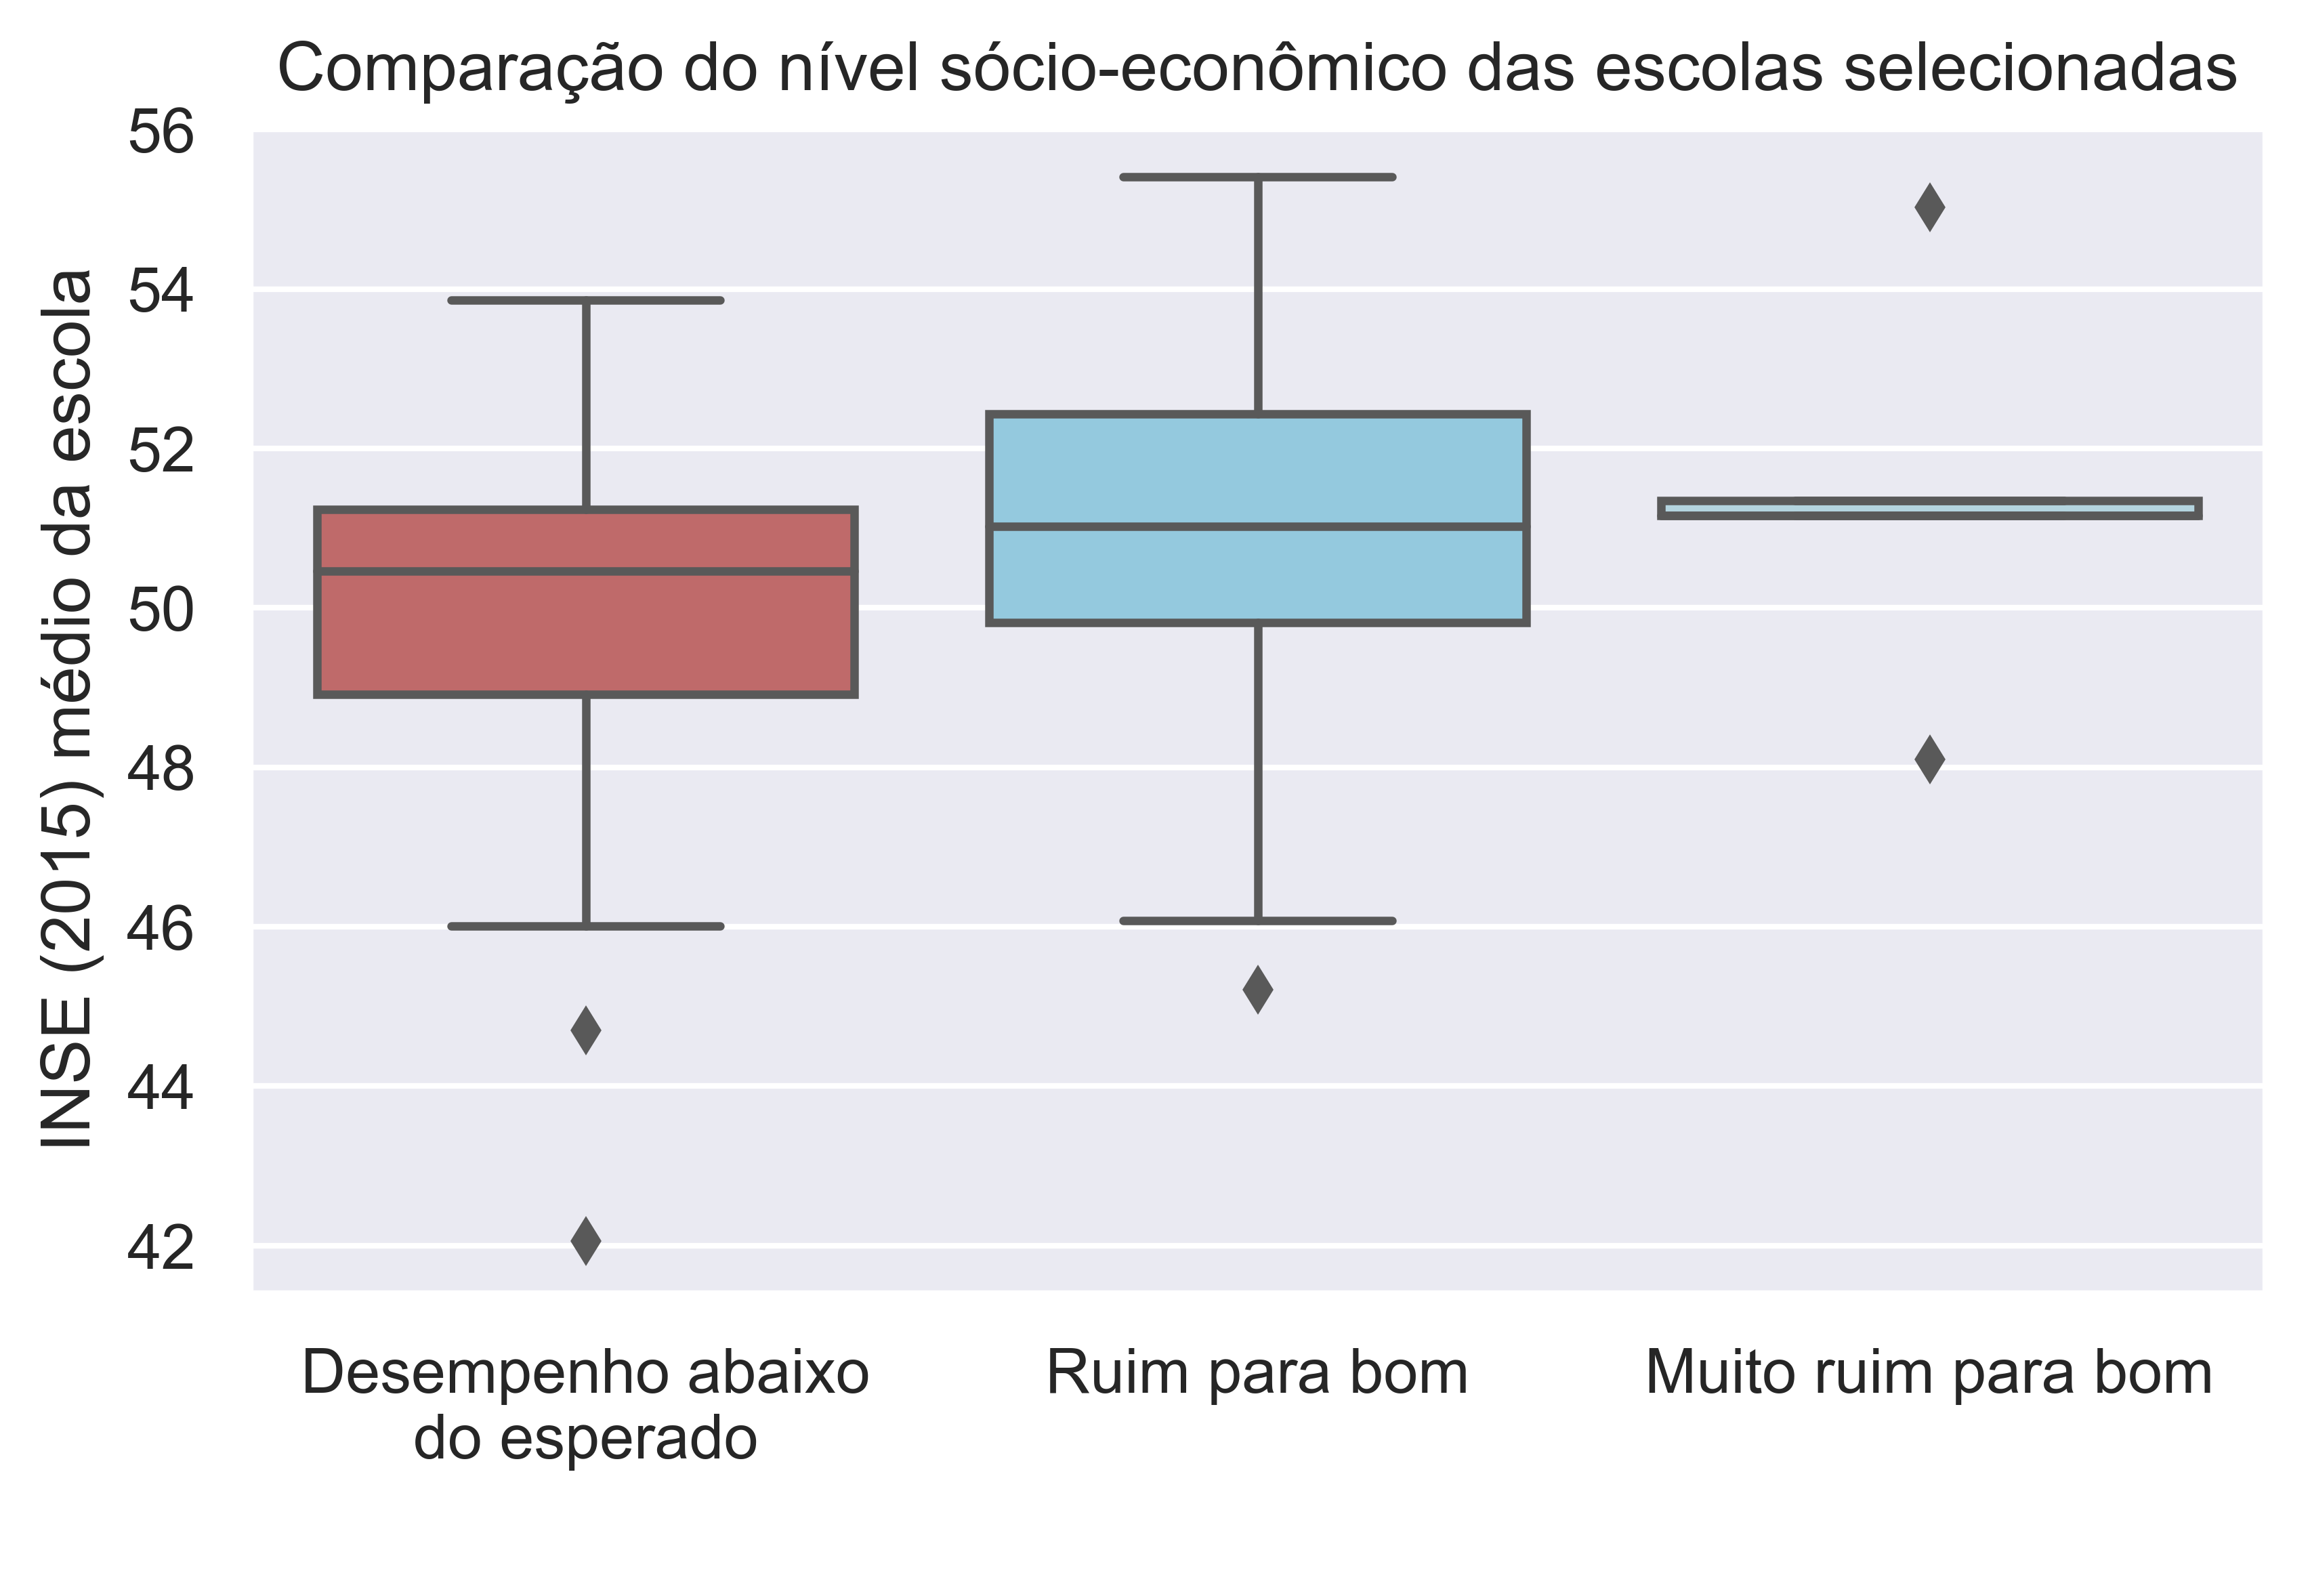

In [16]:
df = pd.read_csv("risco_referencia_inse_saeb.csv")

sen.sen_boxplot(x = "tipo_especifico", y = "INSE_VALOR_ABSOLUTO", y_label = "INSE (2015) médio da escola", x_label = " ",
                plot_title = "Comparação do nível sócio-econômico das escolas selecionadas",
                palette = {"Desempenho abaixo\ndo esperado" : "indianred",
                        "Ruim para bom" : "skyblue",
                        "Muito ruim para bom" : "lightblue"},
                data = df, output_path = "inse_op2.png")

# Testes estatísticos

## Cohen's D

Minha métrica preferida de tamanho de efeito é o Cohen's D, mas aparentemente não tem nenhuma implementação canônica dele. Vou usar a que eu encontrei [nesse site](https://machinelearningmastery.com/effect-size-measures-in-python/).

In [17]:
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt

# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

Todas as escolas referência vs. escolas risco

In [18]:
ttest(risco["INSE_VALOR_ABSOLUTO"], referencias["INSE_VALOR_ABSOLUTO"], nan_policy="omit")

Ttest_indResult(statistic=-4.7024429353712955, pvalue=4.016218893376153e-06)

In [19]:
cohend(referencias["INSE_VALOR_ABSOLUTO"], risco["INSE_VALOR_ABSOLUTO"])

0.5561130900534089

Só as escolas muito ruim pra bom vs. escolas risco

In [20]:
ttest(risco["INSE_VALOR_ABSOLUTO"], referencias.query("tipo_especifico == 'Muito ruim para bom'")["INSE_VALOR_ABSOLUTO"], nan_policy="omit")

Ttest_indResult(statistic=-1.5471060568725692, pvalue=0.12400256396938744)

In [21]:
cohend(referencias.query("tipo_especifico == 'Muito ruim para bom'")["INSE_VALOR_ABSOLUTO"], risco["INSE_VALOR_ABSOLUTO"])

0.7041980489338617

# Tentando inferir causalidade

Sabemos que existe uma diferença significativa entre os níveis sócio econômicos dos 2 grupos. Mas até que ponto essa diferença no INSE é capaz de explicar a diferença no saeb? Será que resta algum efeito que pode ser atribuído às práticas de gestão? Esses testes buscam encontrar uma resposta para essa pergunta.

## Regressões lineares

In [23]:
#pega a nota do saeb pra servir de DV
saeb = pd.read_csv("./pr-educacao/data/output/kepler_saeb_with_filters.csv")
saeb = saeb.query("ano == 2017").copy()
nota_saeb = saeb[["cod_inep", "saeb"]]

In [24]:
df = pd.merge(df, nota_saeb, how = "left", on = "cod_inep")

In [25]:
df.dropna(subset=["INSE_VALOR_ABSOLUTO"], inplace = True)

In [26]:
df["tipo_bin"] = np.where(df["tipo"] == "Escolas-referência", 1, 0)

In [27]:
from statsmodels.regression.linear_model import OLS as ols_py
from statsmodels.tools.tools import add_constant

ivs_multi = add_constant(df[["tipo_bin", "INSE_VALOR_ABSOLUTO"]])

modelo_multi = ols_py(df[["saeb"]], ivs_multi).fit()

print(modelo_multi.summary())

/home/almeida2808/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                   saeb   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     307.8
Date:                seg, 03 jun 2019   Prob (F-statistic):           1.00e-71
Time:                        21:09:53   Log-Likelihood:                -45.456
No. Observations:                 286   AIC:                             96.91
Df Residuals:                     283   BIC:                             107.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.4812    

O problema de fazer a regressão da maneira como eu coloquei acima é que tipo_bin foi criada parcialmente em função do saeb (ver histogramas abaixo), então não é uma variável verdadeiramente independente. Talvez uma estratégia seja comparar modelos simples só com INSE e só com tipo_bin.

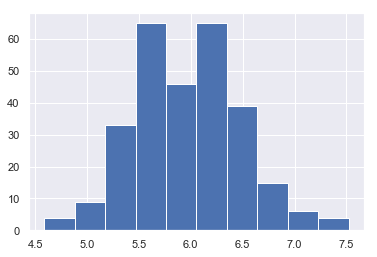

In [28]:
df.saeb.hist()

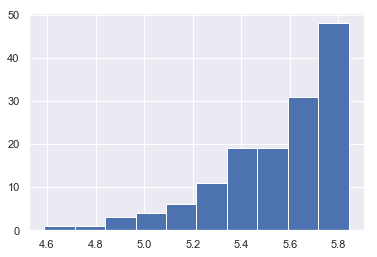

In [29]:
df.query("tipo_bin == 0").saeb.hist()

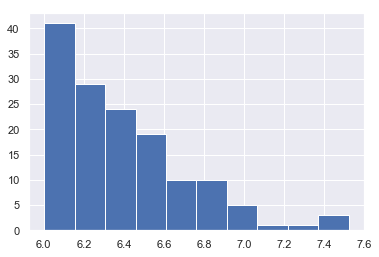

In [30]:
df.query("tipo_bin == 1").saeb.hist()

In [31]:
#correlação simples
from scipy.stats import pearsonr

pearsonr(df[["saeb"]], df[["INSE_VALOR_ABSOLUTO"]])

(array([0.29960379]), array([2.42154766e-07]))

In [32]:
iv_inse = add_constant(df[["INSE_VALOR_ABSOLUTO"]])
iv_saeb = add_constant(df[["tipo_bin"]])

modelo_inse = ols_py(df[["saeb"]], iv_inse).fit()
modelo_tipo = ols_py(df[["saeb"]], iv_saeb).fit()

print(modelo_inse.summary())
print("-----------------------------------------------------------")
print(modelo_tipo.summary())

                            OLS Regression Results                            
Dep. Variable:                   saeb   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     28.01
Date:                seg, 03 jun 2019   Prob (F-statistic):           2.42e-07
Time:                        21:10:24   Log-Likelihood:                -197.22
No. Observations:                 286   AIC:                             398.4
Df Residuals:                     284   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1247    

/home/almeida2808/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Testes pareados

Nossa unidade de observação, na verdade, não deveria ser uma escola, mas sim um par de escolas. Abaixo, tento fazer as análises levando em consideração o delta de INSE e o delta de saeb para cada par de escolas. Isso é importante: sabemos que o INSE faz a diferença no saeb geral, mas a pergunta é se ele consegue explicar as diferenças na performance dentro de cada par.

In [52]:
pairs = pd.read_csv("./pr-educacao/data/output/model_neighboors_saeb_closest_multiple.csv")
pairs.drop_duplicates(inplace = True)

In [53]:
pairs.head()

,Unnamed: 0,escola_risco,cod_inep_risco,saeb_2017_risco,nome_escola,cod_inep,saeb,pessimo_pra_bom_bin,ruim_pra_bom_bin,melhora_com_final_bom_bin,distancia,geometry,lat,lon
0,0,1019064 ESCOLA MUNICIPAL ALVARO VALLE,33146110,5.541397,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,994.077052,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753
1,1,1019502 CIEP MAESTRO HEITOR VILLA LOBOS,33084106,5.374577,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,3032.706412,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753
2,2,1019206 CIEP BARAO DE ITARARE,33084068,5.401031,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,2114.404827,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753
3,3,1019210 CIEP ALBERTO PASQUALINI,33084041,5.800098,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,2610.657736,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753
4,4,1019006 ESCOLA MUNICIPAL VIVALDO RAMOS DE VASC...,33085137,5.746812,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,4459.930102,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753


In [54]:
pairs.shape

(149, 14)

In [55]:
inse_risco = inse[["cod_inep", "INSE_VALOR_ABSOLUTO"]]
inse_risco.columns = ["cod_inep_risco","inse_risco"]

inse_ref = inse[["cod_inep", "INSE_VALOR_ABSOLUTO"]]
inse_ref.columns = ["cod_inep","inse_referencia"]

In [56]:
pairs = pd.merge(pairs, inse_risco, how = "left", on = "cod_inep_risco")
pairs = pd.merge(pairs, inse_ref, how = "left", on = "cod_inep")

In [61]:
#calcula os deltas
pairs["delta_inse"] = pairs["inse_referencia"] - pairs["inse_risco"]
pairs["delta_saeb"] = pairs["saeb"] - pairs["saeb_2017_risco"]

In [62]:
pairs["delta_inse"].describe()

count    140.000000
mean       0.995786
std        2.200706
min       -2.450000
25%       -0.692500
50%        0.895000
75%        2.130000
max       11.050000
Name: delta_inse, dtype: float64

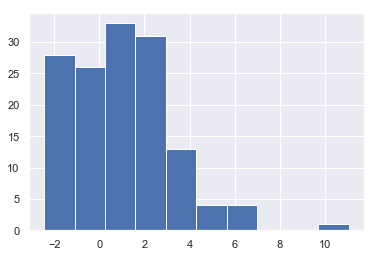

In [63]:
pairs["delta_inse"].hist()

In [64]:
pairs["delta_saeb"].describe()

count    149.000000
mean       0.837528
std        0.383442
min        0.214113
25%        0.566745
50%        0.805058
75%        1.014881
max        2.268745
Name: delta_saeb, dtype: float64

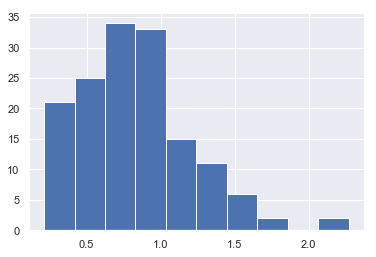

In [65]:
pairs["delta_saeb"].hist()

In [66]:
pairs[pairs["delta_inse"].isnull()]

,Unnamed: 0,escola_risco,cod_inep_risco,saeb_2017_risco,nome_escola,cod_inep,saeb,pessimo_pra_bom_bin,ruim_pra_bom_bin,melhora_com_final_bom_bin,distancia,geometry,lat,lon,inse_risco,inse_referencia,delta_inse,delta_saeb
6,6,1019072 ESCOLA MUNICIPAL MARIA DE JESUS OLIVEIRA,33083991,5.381322,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,1594.427769,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753,NaN,51.90,NaN,0.655025
22,113,0918008 ESCOLA MUNICIPAL ALBERTO NEPOMUCENO,33082553,5.832251,1019033 ESCOLA MUNICIPAL ESPANHA,33084653,6.459362,0,1,0,3298.947315,POINT (-43.6371192667296 -22.91510590427039),-22.915106,-43.637119,NaN,52.53,NaN,0.627111
69,510,0514005 ESCOLA MUNICIPAL BOLIVIA,33074356,5.270003,0515001 ESCOLA MUNICIPAL PARA,33074640,6.154070,0,1,0,3748.159796,POINT (-43.3494898373049 -22.85196250118587),-22.851963,-43.349490,NaN,51.19,NaN,0.884067
79,682,0411017 ESCOLA MUNICIPAL MINISTRO AFRANIO COSTA,33070709,5.607278,0431023 ESCOLA MUNICIPAL PRESIDENTE GRONCHI,33070776,6.298786,0,1,0,5045.051657,POINT (-43.32227637295602 -22.813711796489),-22.813712,-43.322276,NaN,53.50,NaN,0.691508
86,781,0430501 CIEP PRESIDENTE SAMORA MACHEL,33068801,5.348370,0410001 ESCOLA MUNICIPAL EMA NEGRAO DE LIMA,33069247,6.619847,0,1,1,2989.292488,POINT (-43.25299934589417 -22.88015307162323),-22.880153,-43.252999,NaN,49.63,NaN,1.271477
107,802,0107013 ESCOLA MUNICIPAL ALICE DO AMARAL PEIXOTO,33066205,5.641402,0410001 ESCOLA MUNICIPAL EMA NEGRAO DE LIMA,33069247,6.619847,0,1,1,2185.794854,POINT (-43.25299934589417 -22.88015307162323),-22.880153,-43.252999,NaN,49.63,NaN,0.978446
116,816,1120503 CIEP DOUTOR JOAO RAMOS DE SOUZA,33085412,5.378677,0430004 ESCOLA MUNICIPAL IV CENTENARIO,33069263,6.234941,0,1,0,9019.204306,POINT (-43.24338681134873 -22.86146732519574),-22.861467,-43.243387,NaN,49.27,NaN,0.856264
130,1772,0716004 ESCOLA MUNICIPAL JULIANO MOREIRA,33078041,5.367619,0734006 ESCOLA MUNICIPAL FREDERICO EYER,33077908,6.807209,0,1,1,4007.672110,POINT (-43.36053272781284 -22.94430237643981),-22.944302,-43.360533,51.79,NaN,NaN,1.439590
135,1890,0817046 ESCOLA MUNICIPAL RAUL FRANCISCO RYFF,33081085,4.959863,0918503 CIEP LAMARTINE BABO,33081840,6.004167,0,1,0,6931.363252,POINT (-43.54057214757714 -22.90879029767425),-22.908790,-43.540572,NaN,53.09,NaN,1.044304


In [67]:
clean_pairs = pairs.dropna(subset = ["delta_inse"])

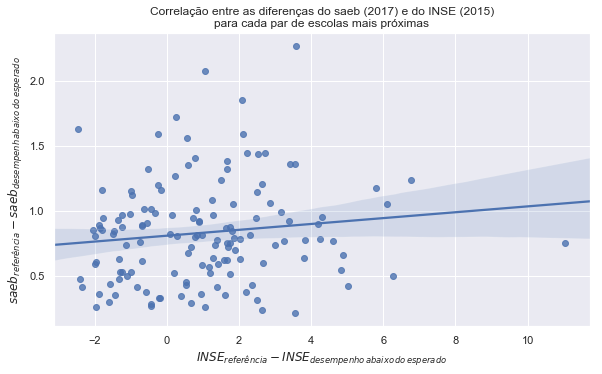

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = sen.aspect_ratio_locker([16, 9], 0.6))

inse_plot = sns.regplot("delta_inse", "delta_saeb", data = clean_pairs)

plt.title("Correlação entre as diferenças do saeb (2017) e do INSE (2015)\npara cada par de escolas mais próximas")
plt.xlabel("$INSE_{referência} - INSE_{desempenho\,abaixo\,do\,esperado}$", fontsize = 12)
plt.ylabel("$saeb_{referência} - saeb_{desempenh\,abaixo\,do\,esperado}$", fontsize = 12)

inse_plot.get_figure().savefig("delta_inse.png", dpi = 600)

In [69]:
pearsonr(clean_pairs[["delta_saeb"]], clean_pairs[["delta_inse"]])

(array([0.12780931]), array([0.13235471]))

In [70]:
X =  add_constant(clean_pairs[["delta_inse"]]) 

modelo_pairs = ols_py(clean_pairs[["delta_saeb"]], X).fit()

print(modelo_pairs.summary())

                            OLS Regression Results                            
Dep. Variable:             delta_saeb   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.292
Date:                seg, 03 jun 2019   Prob (F-statistic):              0.132
Time:                        21:17:28   Log-Likelihood:                -64.831
No. Observations:                 140   AIC:                             133.7
Df Residuals:                     138   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8085      0.036     22.493      0.0

/home/almeida2808/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Testando a assumption de que distância física se correlaciona com distância de INSE

In [71]:
pairs.head()

,Unnamed: 0,escola_risco,cod_inep_risco,saeb_2017_risco,nome_escola,cod_inep,saeb,pessimo_pra_bom_bin,ruim_pra_bom_bin,melhora_com_final_bom_bin,distancia,geometry,lat,lon,inse_risco,inse_referencia,delta_inse,delta_saeb
0,0,1019064 ESCOLA MUNICIPAL ALVARO VALLE,33146110,5.541397,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,994.077052,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753,53.00,51.9,-1.10,0.494950
1,1,1019502 CIEP MAESTRO HEITOR VILLA LOBOS,33084106,5.374577,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,3032.706412,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753,47.01,51.9,4.89,0.661770
2,2,1019206 CIEP BARAO DE ITARARE,33084068,5.401031,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,2114.404827,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753,48.11,51.9,3.79,0.635316
3,3,1019210 CIEP ALBERTO PASQUALINI,33084041,5.800098,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,2610.657736,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753,49.26,51.9,2.64,0.236249
4,4,1019006 ESCOLA MUNICIPAL VIVALDO RAMOS DE VASC...,33085137,5.746812,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,4459.930102,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753,51.24,51.9,0.66,0.289535


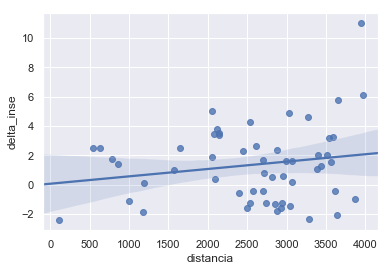

In [72]:
sns.regplot("distancia", "delta_inse", data = clean_pairs.query("distancia < 4000"))

In [73]:
multi_iv = add_constant(clean_pairs[["distancia", "delta_inse"]])

modelo_ze = ols_py(clean_pairs[["delta_saeb"]], multi_iv).fit()

print(modelo_ze.summary())

                            OLS Regression Results                            
Dep. Variable:             delta_saeb   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.538
Date:                seg, 03 jun 2019   Prob (F-statistic):              0.218
Time:                        21:17:38   Log-Likelihood:                -64.430
No. Observations:                 140   AIC:                             134.9
Df Residuals:                     137   BIC:                             143.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7420      0.083      8.924      0.0

/home/almeida2808/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
